# 🌲 Ejemplos de Random Forest en Python

En este notebook aplicaremos el algoritmo Random Forest a tres datasets clásicos de Machine Learning:

- **California Housing** (regresión)
- **Diabetes** (clasificación)
- **Titanic** (clasificación con feature engineering)

Verás cómo usar Random Forest para problemas de regresión y clasificación, y cómo interpretar los resultados.

## 1️⃣ California Housing: Random Forest para Regresión

Predecimos el precio medio de la vivienda en zonas de California usando Random Forest Regressor.

MSE: 0.26, R²: 0.81, RMSE: 0.51, es decir, en promedio el error es de 50534.00 dólares.


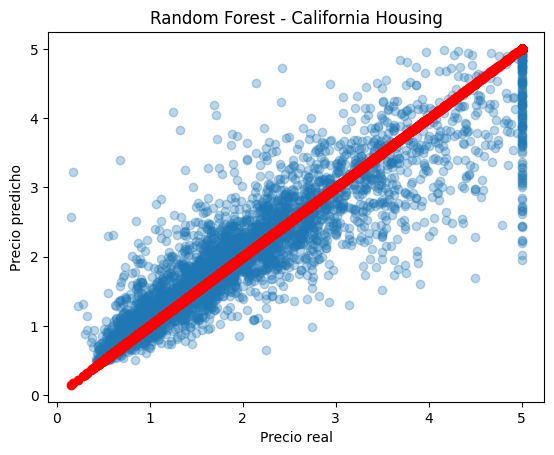

In [5]:
# Importar librerías
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, RMSE: {rmse:.2f}, es decir, en promedio el error es de {rmse*100000:.2f} dólares.')

# Visualizar predicción vs real
plt.scatter(y_test, y_pred, alpha=0.3)
plt.scatter(y_test, y_test, color='red', label='Ideal')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Random Forest - California Housing')
plt.show()

### 📊 Interpretación de los resultados: MSE y R² en California Housing

- **MSE: 0.26**
  - El **MSE** (Error Medio Cuadrático) mide cuánto se equivoca el modelo, en promedio, al predecir el precio de una casa.
  - En este caso, el valor 0.26 significa que, en promedio, el **cuadrado de la diferencia** entre el precio real y el predicho es 0.26 (en las unidades del target, que son cientos de miles de dólares).
  - Un MSE más bajo indica mejores predicciones. Si fuera 0, el modelo acertaría siempre.

- **R²: 0.81**
  - El **R²** (coeficiente de determinación) indica qué porcentaje de la variabilidad del precio real es explicado por el modelo.
  - Un valor de **0.81** significa que el modelo explica el **81% de la variación** en los precios de las casas.
  - Cuanto más cerca de 1, mejor. Un R² de 0 sería como adivinar siempre la media.
- **RMSE: 0.51**
  - El **RMSE** (la raíz cuadrada del MSE) se interpreta en las mismas unidades que el target, facilitando la comprensión del error promedio.
  - Un valor de **0.51** significa que el error medio absoluto es de 0.51 cientos de miles de dólares, es decir, en promedio, el modelo se equivoca unos 51,000 dólares al predecir el precio de una casa.  

**En resumen:** El modelo Random Forest predice bastante bien los precios de las casas en California: comete pocos errores (MSE bajo) y explica la mayor parte de la variabilidad de los precios (R² alto).

## 2️⃣ Diabetes: Random Forest para Clasificación

Clasificamos si un paciente tiene diabetes avanzada usando Random Forest Classifier.

Accuracy: 0.7443609022556391
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        75
           1       0.74      0.64      0.69        58

    accuracy                           0.74       133
   macro avg       0.74      0.73      0.73       133
weighted avg       0.74      0.74      0.74       133



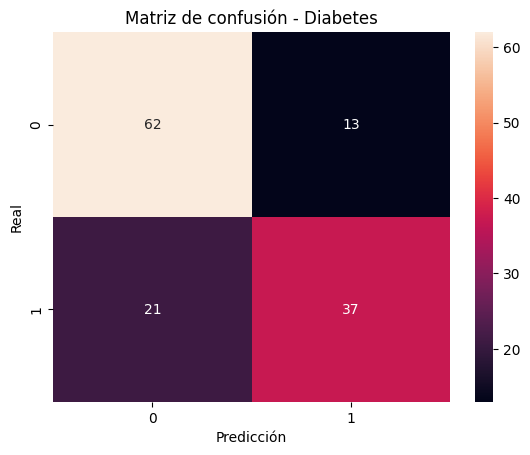

In [6]:
# Importar librerías
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Cargar datos
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = (diabetes.target > diabetes.target.mean()).astype(int)  # 1 si avanzado, 0 si no

# Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de confusión - Diabetes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

- **Accuracy: 0.74**
    El modelo acierta el 74% de las veces al clasificar si un paciente tiene diabetes avanzada o no.

- **Clase 0 (no avanzado):**
    - **Precision: 0.75** → De todos los pacientes que el modelo predijo como "no avanzado", el 75% realmente no lo eran.
    - **Recall: 0.83** → El 83% de los pacientes que realmente no tenían diabetes avanzada fueron correctamente identificados.
    - **F1-score: 0.78** → Media armónica entre precisión y recall.
- **Clase 1 (avanzado):**
    - **Precision: 0.74** → De todos los pacientes que el modelo predijo como "avanzado", el 74% realmente lo eran.
    - **Recall: 0.64** → El 64% de los pacientes que realmente tenían diabetes avanzada fueron correctamente identificados.
    - **F1-score: 0.69** → Media armónica entre precisión y recall.
- **Macro avg:** Promedio simple entre clases.
- **Weighted avg:** Promedio ponderado según el número de muestras de cada clase.

**Resumen:**
El modelo tiene un buen desempeño general (74% de aciertos), pero identifica mejor a los pacientes sin diabetes avanzada (clase 0) que a los que sí la tienen (clase 1), ya que el recall de la clase 1 es más bajo (64%). Esto puede indicar que el modelo tiene más dificultad para detectar correctamente los casos avanzados.

**La matriz de confusión** para el caso de la diabetes muestra cómo el modelo clasifica los pacientes en dos clases:

- 0: No avanzado
- 1: Avanzado

|               | Predicho 0 | Predicho 1 |
|---------------|------------|------------|
| **Real 0**    |     62     |     13     |
| **Real 1**    |     21     |     37     |

**Interpretación:**
- **62:** Pacientes realmente NO avanzados que el modelo clasificó correctamente como NO avanzados **(verdaderos negativos)**.
- **13:** Pacientes realmente NO avanzados que el modelo clasificó incorrectamente como avanzados **(falsos positivos)**.
- **21:** Pacientes realmente avanzados que el modelo clasificó incorrectamente como NO avanzados **(falsos negativos)**.
- **37:** Pacientes realmente avanzados que el modelo clasificó correctamente como avanzados **(verdaderos positivos)**.

**¿Qué nos dice esto?**

- El modelo acierta más en la clase 0 (no avanzado) que en la clase 1 (avanzado).
- Hay más errores al identificar pacientes avanzados (21 falsos negativos) que al identificar no avanzados (13 falsos positivos).
- Esto coincide con el recall más bajo para la clase 1.

## 3️⃣ Titanic: Random Forest para Clasificación con Feature Engineering

Predecimos la supervivencia de pasajeros del Titanic usando Random Forest y creando nuevas variables.

<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Jaf\AppData\Local\Temp\ipykernel_2384\38112479.py:18: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\Jaf\AppData\Local\Temp\ipykernel_2384\38112479.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Jaf\AppData\Local\Temp\ipykernel_2384\38112479.py:15: FutureWarning: A value is try

Accuracy: 0.8097014925373134
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.68      0.73       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



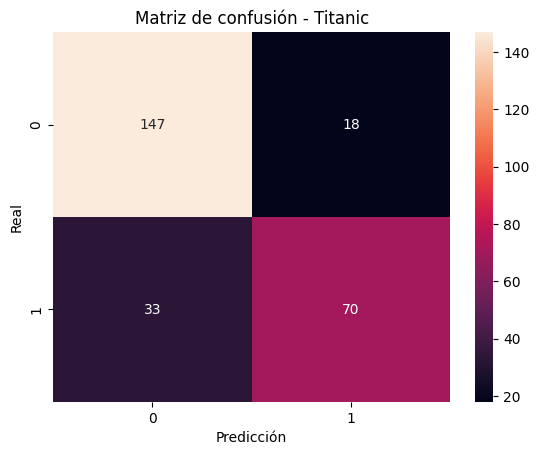

In [7]:
# Importar librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

# Cargar datos
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Feature engineering básico
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df['Title'] = df['Title'].map(title_mapping)

# Codificar variables categóricas
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Seleccionar variables
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = df[features]
y = df['Survived']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de confusión - Titanic')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### 📊 Interpretación de los resultados: Titanic con Random Forest
- **Accuracy: 0.81**  
El modelo acierta el 81% de las veces al predecir si un pasajero sobrevivió o no.

#### Métricas por clase
- **Clase 0 (No sobrevivió):**
  - **Precisión: 0.82** → De todos los pasajeros que el modelo predijo como "no sobrevivió", el 82% realmente no sobrevivió.
  - **Recall: 0.89** → El 89% de los pasajeros que realmente no sobrevivieron fueron correctamente identificados.
  - **F1-score: 0.85** → Media armónica entre precisión y recall.

- **Clase 1 (Sobrevivió):**
  - **Precisión: 0.80** → De todos los pasajeros que el modelo predijo como "sobrevivió", el 80% realmente sobrevivió.
  - **Recall: 0.68** → El 68% de los pasajeros que realmente sobrevivieron fueron correctamente identificados.
  - **F1-score: 0.73** → Media armónica entre precisión y recall.

#### Promedios
- **Macro avg:** Promedio simple entre clases (sin ponderar por cantidad de ejemplos).
- **Weighted avg:** Promedio ponderado según el número de muestras de cada clase.

#### Interpretación general
- El modelo predice mejor la clase "no sobrevivió" (mayor recall y f1-score) que la clase "sobrevivió".
- El recall de la clase 1 (sobrevivió) es más bajo, lo que indica que el modelo tiene más dificultad para identificar correctamente a los supervivientes.
- El modelo es bastante equilibrado, pero tiende a acertar más cuando predice que alguien no sobrevivió.

#### Interpretación de la matriz de confusión
La matriz de confusión muestra cómo el modelo clasifica los pasajeros en dos clases:
- **0:** No sobrevivió
- **1:** Sobrevivió

Por ejemplo, para los resultados obtenidos:
|               | Predicho 0 | Predicho 1 |
|---------------|------------|------------|
| **Real 0**    |    147     |     18     |
| **Real 1**    |     33     |     70     |

- **147:** Pasajeros que realmente NO sobrevivieron y el modelo clasificó correctamente como NO sobrevivientes (**verdaderos negativos**).
- **18:** Pasajeros que realmente NO sobrevivieron pero el modelo clasificó incorrectamente como sobrevivientes (**falsos positivos**).
- **33:** Pasajeros que realmente sobrevivieron pero el modelo clasificó incorrectamente como NO sobrevivientes (**falsos negativos**).
- **70:** Pasajeros que realmente sobrevivieron y el modelo clasificó correctamente como sobrevivientes (**verdaderos positivos**).

**¿Qué nos dice esto?**
- El modelo acierta más en la clase 0 (no sobrevivió) que en la clase 1 (sobrevivió).
- Hay más errores al identificar supervivientes (33 falsos negativos) que al identificar no supervivientes (18 falsos positivos).
- Esto coincide con el recall más bajo para la clase 1.